# Matilde Armageddon Presentation


In [18]:
%matplotlib inline
import armageddon
import matplotlib.pyplot as plt
import numpy as np

Our solve_atmospheric_entry uses Runge Kutta 34 to determine the numerical solution to the given problem.


```python

## Our solving routine

# The system of ODEs
def f(self, y, fragmented, density):
        # 0: velocity
        # 1: mass
        # 2: angle
        # 3: altitude
        # 4: distance
        # 5: radius
        f = np.zeros_like(y)
        f[0] = - (self.Cd * self.rhoa(y[3]) * y[0]**2 * np.pi * y[5]**2) / (2 * y[1]) + (self.g * np.sin(y[2]))
        f[1] = - (self.Ch * self.rhoa(y[3]) * np.pi * y[5]**2 * y[0]**3) / (2 * self.Q)
        f[2] = (self.g * np.cos(y[2])) / y[0]  - (self.Cl * self.rhoa(y[3]) * np.pi * y[5]**2 * y[0]) / (2 * y[1]) - (y[0] * np.cos(y[2])) / (self.Rp + y[3])
        f[3] = - y[0] * np.sin(y[2])
        f[4] = (y[0] * np.cos(y[2])) / (1 + y[3] / self.Rp)
        if fragmented == True:
            f[5] = np.sqrt(7/2 * self.alpha * self.rhoa(y[3]) / density) * y[0]
        else:
            f[5] = 0
        return f
    
# Runge_kutta
def runge_kutta(self, y, f, dt, fragmented, density):
        k1 = f(y, fragmented, density) * dt
        k2 = f(y+k1/2, fragmented, density) * dt
        k3 = f(y+k2/2, fragmented, density) * dt
        k4 = f(y+k3, fragmented, density) * dt

        y = y + (k1 + 2 * (k2 + k3) + k4) / 6
        return y
```

In [9]:
# Defining earth atmosphere with exponential atmospheric pressure
earth = armageddon.Planet(atmos_func='exponential')

# Get impact information for a given set of input parameters
radius = 10      # of the asteroid - assuming sphere
velocity = 20e3  # entry velocity of the asteroid
density = 3000   # density of the asteroid in kg/m^3
strength = 1e5   # strength of the asteroid - to determine asteroid fragmentation during atmospheric entry
angle = 45       # angle of entry

df, dic = earth.impact(10, 20e3, 3000, 1e5, 45)

df # numerical solution given initial conditions

,velocity,mass,angle,altitude,distance,radius,time,dedz
0,20000.000000,1.256637e+07,45.000000,100000.000000,0.000000,10.000000,0.00,0.000000
1,20000.345651,1.256637e+07,44.994732,99292.919615,696.255523,10.000000,0.05,0.000000
2,20000.691162,1.256636e+07,44.989463,98585.892041,1392.663189,10.000000,0.10,0.000000
3,20001.036523,1.256636e+07,44.984192,97878.917308,2089.223034,10.000000,0.15,0.000000
4,20001.381723,1.256636e+07,44.978921,97171.995445,2785.935090,10.000000,0.20,0.000000
...,...,...,...,...,...,...,...,...
9224,26.096410,1.684071e+06,89.942451,6.248150,79410.454247,113.735961,461.20,0.000017
9225,26.094271,1.684070e+06,89.942452,4.943383,79410.455558,113.735961,461.25,0.000017
9226,26.092132,1.684070e+06,89.942452,3.638724,79410.456868,113.735961,461.30,0.000017
9227,26.089994,1.684070e+06,89.942452,2.334172,79410.458178,113.735961,461.35,0.000017


In [10]:
dic  # type of entry event with data analysis results

{'burst_peak_dedz': 66.35633152784206,
 'burst_altitude': 28377.75036629499,
 'burst_total_ke_lost': 442.0066685351022,
 'outcome': 'Airburst'}

In [13]:
# Demonstration of accuracy

In [14]:
# Demonstration of interpolation

In [17]:
# Define fiducial parameters for our ensemble calculation
fiducial_impact = {'radius': 10.0,
                   'angle': 45.0,
                   'strength': 100000.0,
                   'velocity': 21000.0,
                   'density': 3000.0}

# perform the ensemble 
ensemble = armageddon.ensemble.solve_ensemble(earth,
                                              fiducial_impact,
                                              variables=['radius','angle','strength','velocity','density'], radians=False,
                                              rmin=8, rmax=12)

NameError: name 'np' is not defined

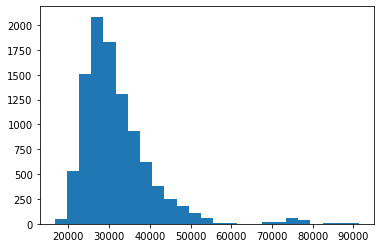

In [21]:
# get the burst altitude
burst_altitude = np.array(ensemble['burst_altitude']).astype('int')
# produce a histogram 
plt.hist(burst_altitude, 25)
plt.show()